# Analysis results of applying variance on association of tracking

In [1]:
import numpy as np
import torch
import math
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re
import csv
import os

In [2]:
def read_one_file(file):
    with open(file,"r",encoding = "utf-8") as f:
        reader = csv.reader(f)
        rows = [row[:23] for row in reader]
    values = [float(num) for num in rows[6][1:]] # MOTA MOTP HOTA ...
    return values

def output_one_scene(path):
    files = os.listdir(path)
    par = []
    metrics = []
    for file in files:
        if file[:4] != "logs":
            continue
        #print(file)
        words = file.split("_")[-1].split(".")
        #print(words)
        par.append(float(words[0]))
        values = read_one_file(path+file)
        metrics.append(values)
    par = np.array(par)
    metrics = np.array(metrics)
    idx = np.argsort(par)
    par = par[idx]
    metrics = metrics[idx].T
    return par, metrics

def plt_figure(par, metric, name, baseline):
    f = plt.figure(figsize=(10, 8))
    font_size = 25
    plt.axes(xscale = "log")
    plt.plot(par, metric)
    base = [baseline for _ in range(len(par))]
    plt.plot(par, base)
    plt.xlabel('NLL_threshold',fontsize=font_size)# x轴标签
    plt.ylabel(name, fontsize=font_size)# y轴标签
    # plt.legend(fontsize = 18)
    # plt.xticks(fontsize=20)
    # plt.yticks(fontsize=20)
    # plt.tight_layout()
    plt.show()
    
def show_all_metrics(path, baseline):
    par, metrics = output_one_scene(path)
    plt_figure(par, metrics[0], "MOTA", baseline[0])
    plt_figure(par, metrics[1], "MOTP", baseline[1])
    plt_figure(par, metrics[2], "HOTA", baseline[2])

## Upperbound, using (x,y,s,r)'s variance

In [3]:
baseline = [52.5972, 85.4168, 41.3384]

### quantile = 10

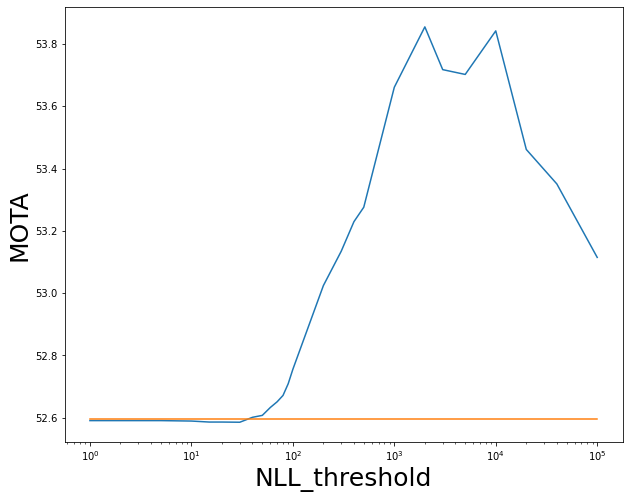

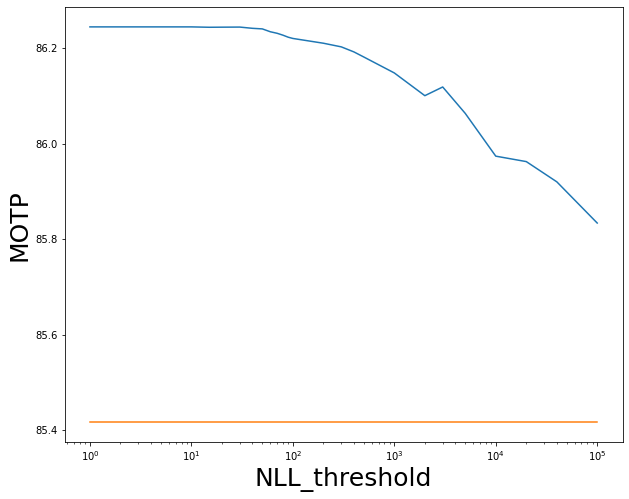

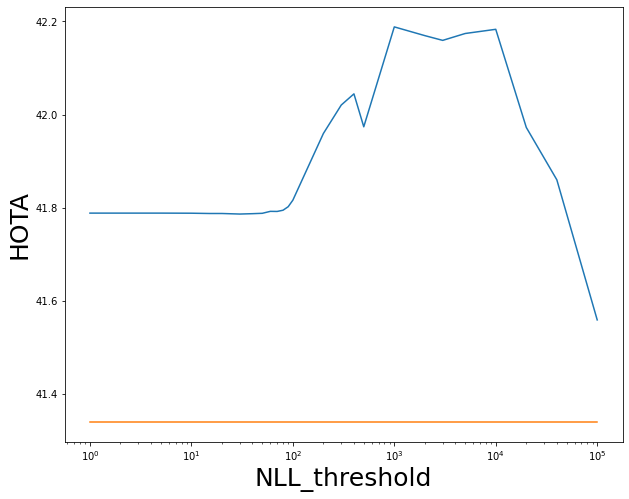

In [7]:
path = "logs/nll_compare/upperbound_q10/"
show_all_metrics(path, baseline)

### conformal prediction 68.27\%

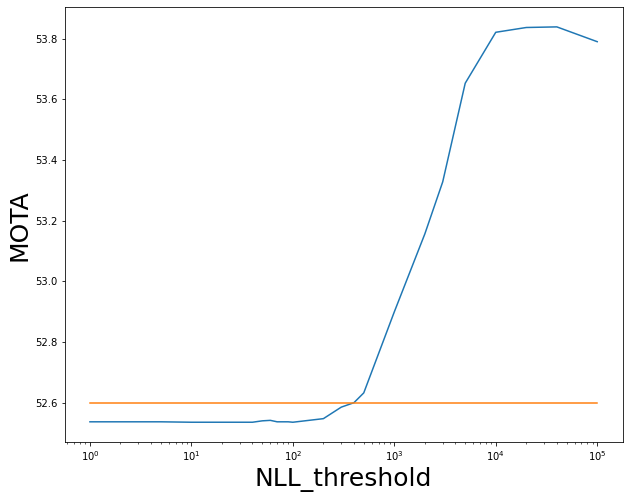

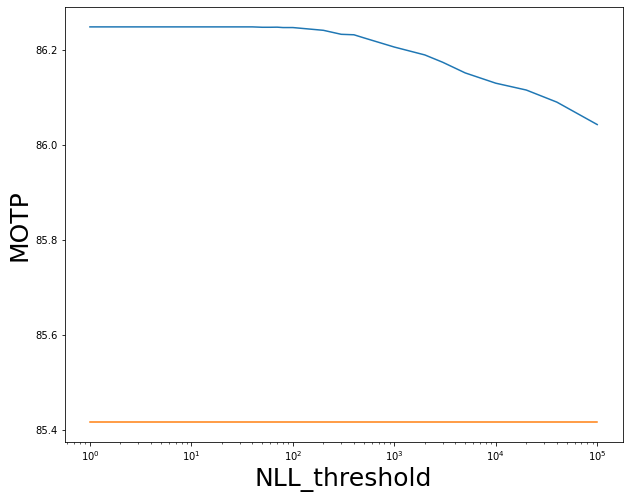

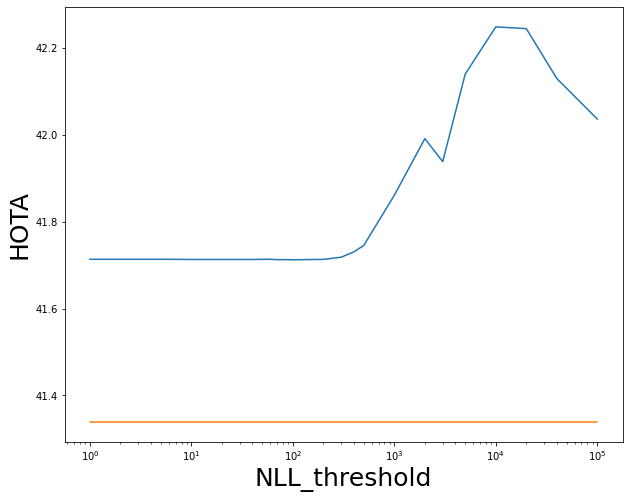

In [6]:
path = "logs/nll_compare/upperbound_cp1/"
show_all_metrics(path, baseline)

### conformal prediction 99.73\%

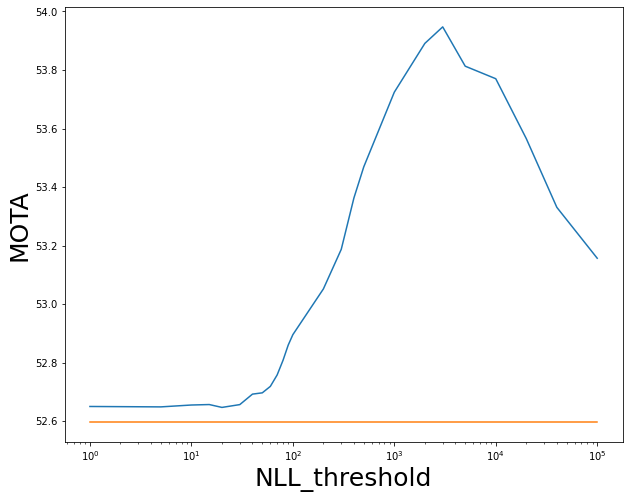

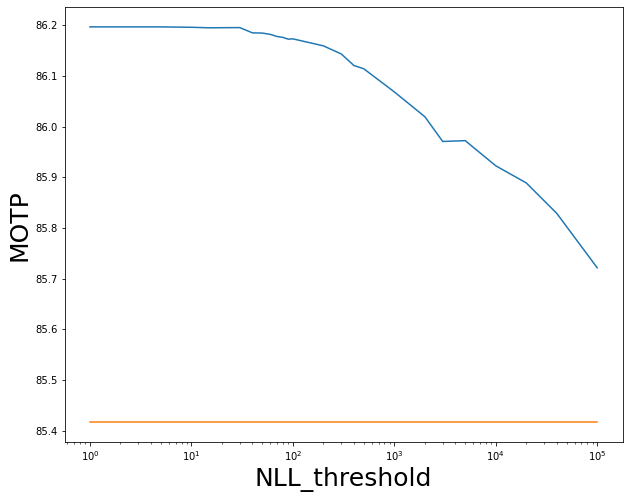

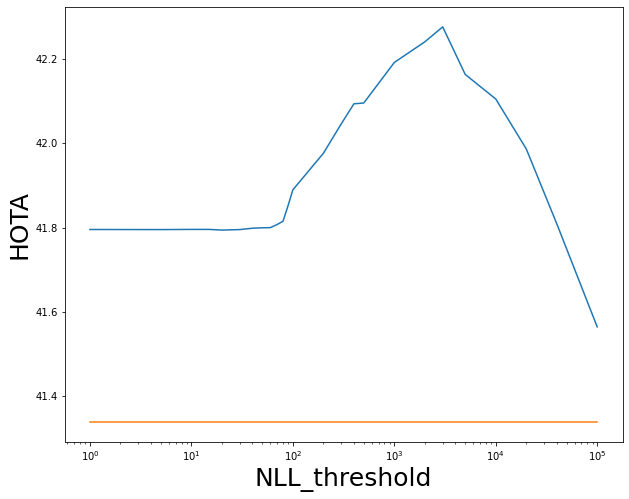

In [5]:
path = "logs/nll_compare/upperbound_cp3/"
show_all_metrics(path, baseline)